In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

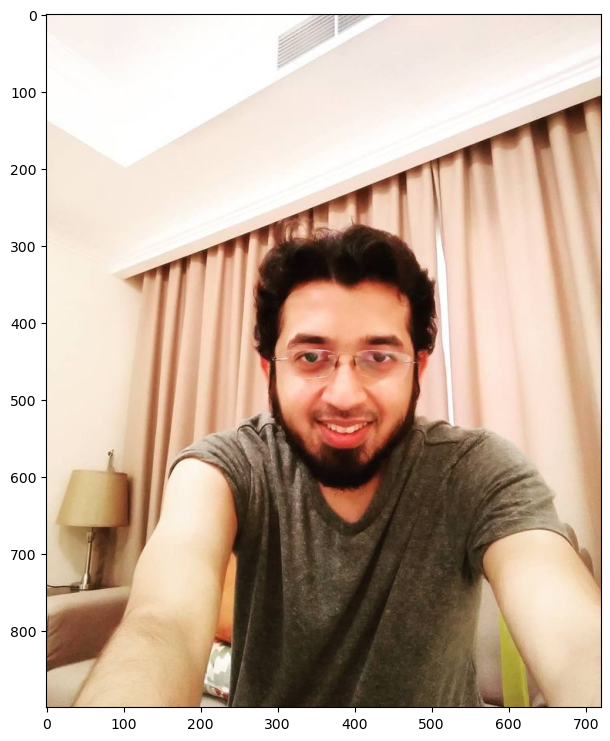

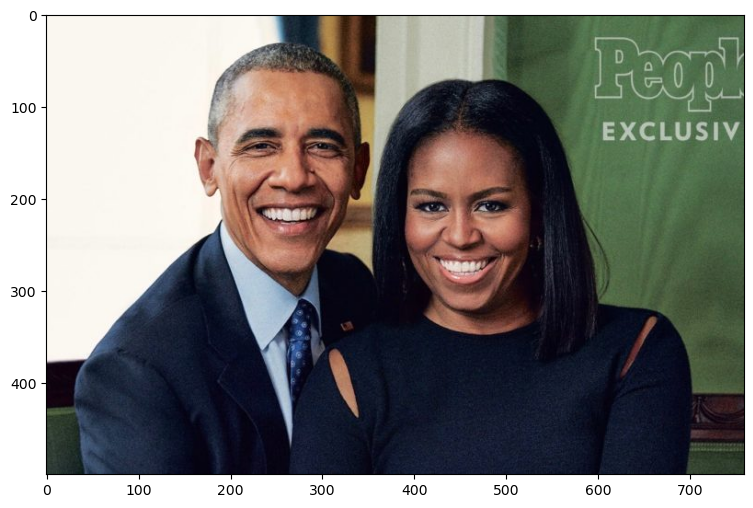

In [4]:
import cv2
# load in color image for face detection
#image = cv2.imread('images/obamas.jpg')
paths =['instatest.jpg', 'obamas.jpg']
cv_images = [] 

for image in paths:
    
    image_rd = cv2.imread('images/'+image)
    image_cvt = cv2.cvtColor(image_rd, cv2.COLOR_BGR2RGB)
    cv_images.append(image_cvt)
    fig = plt.figure(figsize=(9,9))
    plt.imshow(image_cvt)
    plt.show()



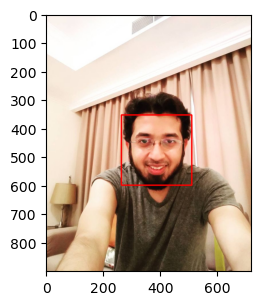

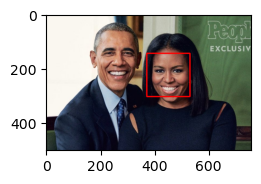

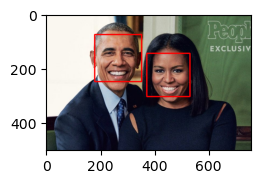

In [5]:
faces = []
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
cv_dict = {}
for index, image in enumerate(cv_images):    

    faces.append(face_cascade.detectMultiScale(image, 1.2, 2))
    cv_dict[index] = face_cascade.detectMultiScale(image, 1.2, 2)
    image_with_detections = image.copy()


for index, image in enumerate(cv_images):
    image_with_detections = cv_images[index].copy()
 
    for (x,y,w,h) in cv_dict[index]:

        cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

        fig = plt.figure(figsize=(9,9))
        plt.subplot(131)
        plt.imshow(image_with_detections)
        plt.show()
        #print(len(faces))

In [13]:
import torch
from models import Net2, Net

net = Net()
net.load_state_dict(torch.load('saved_models/keypoints_model_5.pt'))
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (act1): ReLU()
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxPool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (act2): ReLU()
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxPool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=136, bias=True)
)

In [7]:
from torchvision import transforms

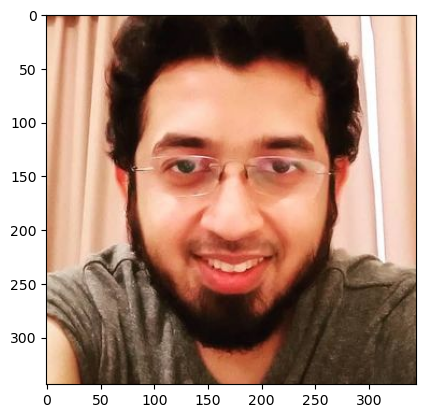

In [93]:
image_copy = np.copy(image)

for (x,y,w,h) in faces[:]:
    margin = int(w*.2)
    roi = image_copy[y-margin:y+h+margin, x-margin:x+w+margin] 
    #roi = image_copy[y:y+h, x:x+w]
    plt.imshow(roi)
    plt.show()

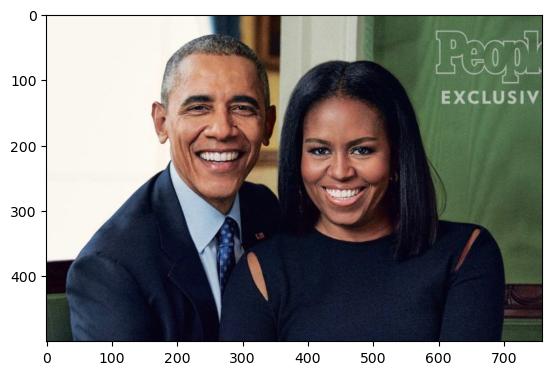

In [38]:
plt.imshow(image_copy)

(68, 2)


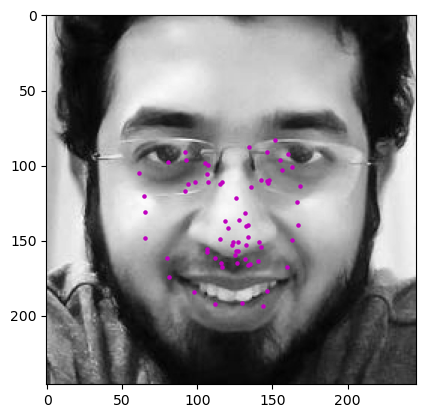

(68, 2)


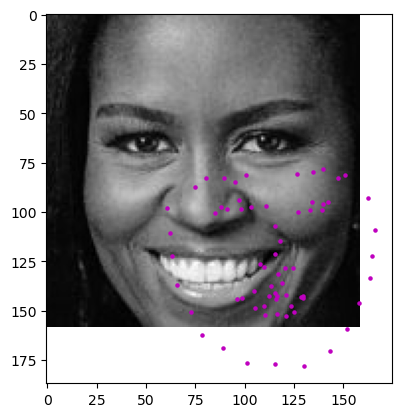

(68, 2)


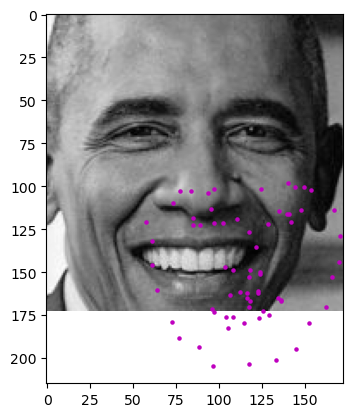

In [23]:

# loop over the detected faces from your haar cascade
for index, image in enumerate(cv_images):
    image_copy = np.copy(image)
    faces = cv_dict[index]
    for (x,y,w,h) in faces[:]:
        
        # Select the region of interest that is the face in the image 
        #roi = image_copy[y:y+h, x:x+w]
        #margin = int(w*.3)
        margin = 0
        roi = image_copy[y-margin:y+h+margin, x-margin:x+w+margin]  
        ## TODO: Convert the face region from RGB to grayscale
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

        #print(roi_gray.shape)
        roi_normalized = roi_gray / 255
        roi_resized = cv2.resize(roi_normalized, (224,224))
        roi_exp_dims = roi_resized.reshape((224, 224, -1))
        #print(roi_exp_dims.type)
        transform = transforms.ToTensor()
        tensor = transform(roi_exp_dims)        
        transformed_data = tensor.unsqueeze(0).float()
        
        prediction = net(transformed_data)
        predictions = prediction.data
        plt.imshow(roi_gray, cmap='gray')
        output = predictions.view(predictions.size()[0], 68, -1)
        output = output.numpy()
        #key_pts_copy = (key_pts_copy - 100)/50.0
        output = (output * 50) + 100
        output = output.reshape((68,2))
        #print(output)
        print(output.shape)
        plt.scatter(output[:, 0], output[:, 1], s=20, marker='.', c='m')
        plt.show()
    